In [171]:
import pandas as pd
import numpy as np

In [172]:
import torch
import random
import torch.backends.cudnn as cudnn
import numpy as np
import os
seed= 0
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # type: ignore
torch.backends.cudnn.deterministic = True  # type: ignore
torch.backends.cudnn.benchmark = False  # type: ignore

In [173]:
train_1=pd.read_csv(r'C:\Users\yuntaeyang\Desktop\w_train_1_group.csv')

In [174]:
test_1=pd.read_csv(r'C:\Users\yuntaeyang\Desktop\w_test_1_group.csv')

In [175]:
train_1['TPTP'] = train_1['TPGRP_TPCD'].astype(str)  + train_1['PRDN_FOM_C'].astype(str)  

In [176]:
train_1['target_1'] = train_1['target']
train_1=train_1.drop(['date', 'umd', 'target'], axis=1)

In [177]:
train_1_array=np.array(train_1)

In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_1_array[:, 64]=le.fit_transform(train_1_array[:,64])

In [179]:
train_1_array[:, 6]=le.fit_transform(train_1_array[:,6])

In [180]:
train_1= pd.DataFrame(train_1_array, columns=train_1.columns)

In [181]:
train_1=train_1.astype(float)

In [182]:
test_1['TPTP'] = test_1['TPGRP_TPCD'].astype(str)  + test_1['PRDN_FOM_C'].astype(str) 

In [183]:
test_1=test_1.sort_values(by=['index'])

In [184]:
test_id_1=test_1[['index', 'date', 'umd']]

In [185]:
test_1=test_1.drop(['index', 'date', 'umd'], axis=1)
test_1_array=np.array(test_1)

In [186]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 64]=le.fit_transform(test_1_array[:,64])

In [187]:
test_1_array[:, 6]=le.fit_transform(test_1_array[:,6])

In [188]:
test_1= pd.DataFrame(test_1_array, columns=test_1.columns)

In [189]:
test_1=test_1.astype(float)

In [190]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [192]:
# IsolationForest 모델 만들기
isol = IsolationForest(max_samples=100, random_state=200) 

# 만들어 둔 데이터셋에 알고리즘 피팅시키기
isol.fit(X_features)
y_pred= isol.predict(X_features)

In [193]:
isola=pd.DataFrame(y_pred, columns= ['isal'])

In [194]:
train_1=train_1.join(isola, how='inner')

In [195]:
train_1=train_1[train_1['isal']== 1]

In [196]:
train_1=train_1.drop(['isal'], axis=1)

In [197]:
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [198]:
# shuffle1
import sklearn
x_shuffled = sklearn.utils.shuffle(X_features, random_state=3217)
y_shuffled =sklearn.utils.shuffle(y_label, random_state=3217)
X_train, X_test, y_train, y_test=train_test_split(x_shuffled, y_shuffled, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train.shape, X_test.shape)

(3416, 65) (1464, 65)


In [199]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled1, y_resampled1 = smote_nc.fit_resample(X_train, y_train)

In [200]:
X_train1 = np.array(X_resampled1)
y_train1 = np.array(y_resampled1).squeeze()
X_test  = np.array(X_test)
y_test  = np.array(y_test).squeeze()

In [201]:
# shuffle2
x_shuffled2 = sklearn.utils.shuffle(X_features, random_state=3067)
y_shuffled2 =sklearn.utils.shuffle(y_label, random_state=3067)
X_train2, X_test2, y_train2, y_test2=train_test_split(x_shuffled2, y_shuffled2, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train2.shape, X_test2.shape)

(3416, 65) (1464, 65)


In [202]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled2, y_resampled2 = smote_nc.fit_resample(X_train2, y_train2)

In [203]:
X_train2 = np.array(X_resampled2)
y_train2 = np.array(y_resampled2).squeeze()
X_test2  = np.array(X_test2)
y_test2  = np.array(y_test2).squeeze()

In [204]:
# shuffle3
x_shuffled3 = sklearn.utils.shuffle(X_features, random_state=3415)
y_shuffled3 =sklearn.utils.shuffle(y_label, random_state=3415)
X_train3, X_test3, y_train3, y_test3=train_test_split(x_shuffled3, y_shuffled3, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train3.shape, X_test3.shape)

(3416, 65) (1464, 65)


In [205]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled3, y_resampled3 = smote_nc.fit_resample(X_train3, y_train3)

In [206]:
X_train3 = np.array(X_resampled3)
y_train3 = np.array(y_resampled3).squeeze()
X_test3  = np.array(X_test3)
y_test3  = np.array(y_test3).squeeze()

In [207]:
# shuffle4
x_shuffled4 = sklearn.utils.shuffle(X_features, random_state=3563)
y_shuffled4 =sklearn.utils.shuffle(y_label, random_state=3563)
X_train4, X_test4, y_train4, y_test4=train_test_split(x_shuffled4, y_shuffled4, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train4.shape, X_test4.shape)

(3416, 65) (1464, 65)


In [208]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled4, y_resampled4 = smote_nc.fit_resample(X_train4, y_train4)

In [209]:
X_train4 = np.array(X_resampled4)
y_train4 = np.array(y_resampled4).squeeze()
X_test4  = np.array(X_test4)
y_test4  = np.array(y_test4).squeeze()

In [210]:
# shuffle5
x_shuffled5 = sklearn.utils.shuffle(X_features, random_state=3528)
y_shuffled5 =sklearn.utils.shuffle(y_label, random_state=3528)
X_train5, X_test5, y_train5, y_test5=train_test_split(x_shuffled5, y_shuffled5, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train5.shape, X_test5.shape)

(3416, 65) (1464, 65)


In [211]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled5, y_resampled5 = smote_nc.fit_resample(X_train5, y_train5)

In [212]:
X_train5 = np.array(X_resampled5)
y_train5 = np.array(y_resampled5).squeeze()
X_test5  = np.array(X_test5)
y_test5  = np.array(y_test5).squeeze()

In [213]:
# shuffle6
x_shuffled6 = sklearn.utils.shuffle(X_features, random_state=3006)
y_shuffled6 =sklearn.utils.shuffle(y_label, random_state=3006)
X_train6, X_test6, y_train6, y_test6=train_test_split(x_shuffled6, y_shuffled6, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train6.shape, X_test6.shape)

(3416, 65) (1464, 65)


In [214]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled6, y_resampled6 = smote_nc.fit_resample(X_train6, y_train6)

In [215]:
X_train6 = np.array(X_resampled6)
y_train6 = np.array(y_resampled6).squeeze()
X_test6  = np.array(X_test6)
y_test6  = np.array(y_test6).squeeze()

In [216]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [217]:
import torch

In [218]:
# model1
clf1 = TabNetClassifier(seed=0)
clf1.fit(
    X_train1, y_train1,
    eval_set=[(X_test, y_test)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.83    | val_0_auc: 0.47246 |  0:00:01s
epoch 1  | loss: 0.61081 | val_0_auc: 0.45552 |  0:00:03s
epoch 2  | loss: 0.54635 | val_0_auc: 0.44497 |  0:00:05s
epoch 3  | loss: 0.4728  | val_0_auc: 0.49626 |  0:00:06s
epoch 4  | loss: 0.41302 | val_0_auc: 0.56652 |  0:00:08s
epoch 5  | loss: 0.35993 | val_0_auc: 0.5495  |  0:00:10s
epoch 6  | loss: 0.33269 | val_0_auc: 0.5461  |  0:00:12s
epoch 7  | loss: 0.31894 | val_0_auc: 0.54394 |  0:00:14s
epoch 8  | loss: 0.30716 | val_0_auc: 0.57244 |  0:00:16s
epoch 9  | loss: 0.28638 | val_0_auc: 0.55515 |  0:00:18s
epoch 10 | loss: 0.27082 | val_0_auc: 0.64758 |  0:00:20s
epoch 11 | loss: 0.25646 | val_0_auc: 0.64037 |  0:00:22s
epoch 12 | loss: 0.25145 | val_0_auc: 0.59299 |  0:00:24s
epoch 13 | loss: 0.23775 | val_0_auc: 0.586   |  0:00:26s
epoch 14 | loss: 0.22458 | val_0_auc: 0.57606 |  0:00:27s
epoch 15 | loss: 0.22457 | val_0_auc: 0.55548 |  0:00:29s
epoch 16 | loss: 0.21792 | val_0_auc: 0.56652 |  0:00:

In [219]:
# model2
clf2 = TabNetClassifier(seed=0)
clf2.fit(
    X_train2, y_train2,
    eval_set=[(X_test2, y_test2)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.8441  | val_0_auc: 0.43387 |  0:00:01s
epoch 1  | loss: 0.66211 | val_0_auc: 0.48536 |  0:00:03s
epoch 2  | loss: 0.6036  | val_0_auc: 0.61214 |  0:00:04s
epoch 3  | loss: 0.55172 | val_0_auc: 0.58561 |  0:00:06s
epoch 4  | loss: 0.4858  | val_0_auc: 0.5201  |  0:00:07s
epoch 5  | loss: 0.45048 | val_0_auc: 0.5459  |  0:00:09s
epoch 6  | loss: 0.40448 | val_0_auc: 0.52664 |  0:00:11s
epoch 7  | loss: 0.36425 | val_0_auc: 0.66033 |  0:00:13s
epoch 8  | loss: 0.34325 | val_0_auc: 0.5239  |  0:00:14s
epoch 9  | loss: 0.31978 | val_0_auc: 0.53089 |  0:00:16s
epoch 10 | loss: 0.31105 | val_0_auc: 0.59083 |  0:00:17s
epoch 11 | loss: 0.29223 | val_0_auc: 0.54943 |  0:00:19s
epoch 12 | loss: 0.27879 | val_0_auc: 0.55379 |  0:00:20s
epoch 13 | loss: 0.26986 | val_0_auc: 0.50793 |  0:00:22s
epoch 14 | loss: 0.25867 | val_0_auc: 0.57093 |  0:00:23s
epoch 15 | loss: 0.24988 | val_0_auc: 0.58875 |  0:00:25s
epoch 16 | loss: 0.24282 | val_0_auc: 0.59041 |  0:00:

epoch 141| loss: 0.04504 | val_0_auc: 0.91064 |  0:03:50s
epoch 142| loss: 0.03859 | val_0_auc: 0.90525 |  0:03:52s
epoch 143| loss: 0.04711 | val_0_auc: 0.91045 |  0:03:54s
epoch 144| loss: 0.05857 | val_0_auc: 0.91406 |  0:03:55s
epoch 145| loss: 0.05153 | val_0_auc: 0.9115  |  0:03:58s
epoch 146| loss: 0.06012 | val_0_auc: 0.90219 |  0:04:00s
epoch 147| loss: 0.0752  | val_0_auc: 0.89715 |  0:04:02s
epoch 148| loss: 0.06672 | val_0_auc: 0.89755 |  0:04:04s
epoch 149| loss: 0.06492 | val_0_auc: 0.9137  |  0:04:06s
epoch 150| loss: 0.05556 | val_0_auc: 0.90723 |  0:04:09s
epoch 151| loss: 0.05427 | val_0_auc: 0.90892 |  0:04:11s
epoch 152| loss: 0.04898 | val_0_auc: 0.91781 |  0:04:13s
epoch 153| loss: 0.05878 | val_0_auc: 0.92332 |  0:04:15s
epoch 154| loss: 0.05366 | val_0_auc: 0.91072 |  0:04:16s
epoch 155| loss: 0.05347 | val_0_auc: 0.89025 |  0:04:18s
epoch 156| loss: 0.04945 | val_0_auc: 0.90714 |  0:04:20s
epoch 157| loss: 0.05751 | val_0_auc: 0.91902 |  0:04:22s
epoch 158| los

In [220]:
# model3
clf3 = TabNetClassifier(seed=0)
clf3.fit(
    X_train3, y_train3,
    eval_set=[(X_test3, y_test3)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.81977 | val_0_auc: 0.4318  |  0:00:01s
epoch 1  | loss: 0.65499 | val_0_auc: 0.45938 |  0:00:03s
epoch 2  | loss: 0.57744 | val_0_auc: 0.5542  |  0:00:05s
epoch 3  | loss: 0.5143  | val_0_auc: 0.59091 |  0:00:07s
epoch 4  | loss: 0.44415 | val_0_auc: 0.59978 |  0:00:09s
epoch 5  | loss: 0.40495 | val_0_auc: 0.52361 |  0:00:10s
epoch 6  | loss: 0.33702 | val_0_auc: 0.53329 |  0:00:13s
epoch 7  | loss: 0.28309 | val_0_auc: 0.5414  |  0:00:14s
epoch 8  | loss: 0.25684 | val_0_auc: 0.54431 |  0:00:16s
epoch 9  | loss: 0.23359 | val_0_auc: 0.45833 |  0:00:18s
epoch 10 | loss: 0.22764 | val_0_auc: 0.53645 |  0:00:21s
epoch 11 | loss: 0.20666 | val_0_auc: 0.62937 |  0:00:22s
epoch 12 | loss: 0.20882 | val_0_auc: 0.49986 |  0:00:24s
epoch 13 | loss: 0.21595 | val_0_auc: 0.51613 |  0:00:25s
epoch 14 | loss: 0.19747 | val_0_auc: 0.4588  |  0:00:27s
epoch 15 | loss: 0.17588 | val_0_auc: 0.46893 |  0:00:28s
epoch 16 | loss: 0.17675 | val_0_auc: 0.65986 |  0:00:

In [221]:
# model4
clf4 = TabNetClassifier(seed=0)
clf4.fit(
    X_train4, y_train4,
    eval_set=[(X_test4, y_test4)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.81672 | val_0_auc: 0.36688 |  0:00:01s
epoch 1  | loss: 0.60162 | val_0_auc: 0.46427 |  0:00:03s
epoch 2  | loss: 0.53015 | val_0_auc: 0.48599 |  0:00:04s
epoch 3  | loss: 0.4537  | val_0_auc: 0.42238 |  0:00:06s
epoch 4  | loss: 0.374   | val_0_auc: 0.42778 |  0:00:08s
epoch 5  | loss: 0.33458 | val_0_auc: 0.54379 |  0:00:10s
epoch 6  | loss: 0.30104 | val_0_auc: 0.56806 |  0:00:11s
epoch 7  | loss: 0.29285 | val_0_auc: 0.59955 |  0:00:13s
epoch 8  | loss: 0.27739 | val_0_auc: 0.56952 |  0:00:15s
epoch 9  | loss: 0.25535 | val_0_auc: 0.57003 |  0:00:16s
epoch 10 | loss: 0.24386 | val_0_auc: 0.59304 |  0:00:18s
epoch 11 | loss: 0.23597 | val_0_auc: 0.61202 |  0:00:20s
epoch 12 | loss: 0.22412 | val_0_auc: 0.5982  |  0:00:22s
epoch 13 | loss: 0.20384 | val_0_auc: 0.63268 |  0:00:23s
epoch 14 | loss: 0.20398 | val_0_auc: 0.62113 |  0:00:25s
epoch 15 | loss: 0.20014 | val_0_auc: 0.63155 |  0:00:27s
epoch 16 | loss: 0.19541 | val_0_auc: 0.55624 |  0:00:

In [222]:
# model5
clf5 = TabNetClassifier(seed=0)
clf5.fit(
    X_train5, y_train5,
    eval_set=[(X_test5, y_test5)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.84441 | val_0_auc: 0.40284 |  0:00:02s
epoch 1  | loss: 0.64969 | val_0_auc: 0.38032 |  0:00:04s
epoch 2  | loss: 0.59879 | val_0_auc: 0.32805 |  0:00:06s
epoch 3  | loss: 0.54072 | val_0_auc: 0.48081 |  0:00:08s
epoch 4  | loss: 0.46718 | val_0_auc: 0.46775 |  0:00:10s
epoch 5  | loss: 0.41307 | val_0_auc: 0.48896 |  0:00:12s
epoch 6  | loss: 0.35606 | val_0_auc: 0.52397 |  0:00:14s
epoch 7  | loss: 0.3241  | val_0_auc: 0.58644 |  0:00:16s
epoch 8  | loss: 0.29134 | val_0_auc: 0.63834 |  0:00:18s
epoch 9  | loss: 0.26053 | val_0_auc: 0.65544 |  0:00:20s
epoch 10 | loss: 0.24545 | val_0_auc: 0.675   |  0:00:21s
epoch 11 | loss: 0.23849 | val_0_auc: 0.6714  |  0:00:22s
epoch 12 | loss: 0.22953 | val_0_auc: 0.69614 |  0:00:23s
epoch 13 | loss: 0.22087 | val_0_auc: 0.699   |  0:00:24s
epoch 14 | loss: 0.20683 | val_0_auc: 0.689   |  0:00:26s
epoch 15 | loss: 0.20266 | val_0_auc: 0.68166 |  0:00:27s
epoch 16 | loss: 0.18664 | val_0_auc: 0.63428 |  0:00:

In [223]:
# model6
clf6 = TabNetClassifier(seed=0)
clf6.fit(
    X_train6, y_train6,
    eval_set=[(X_test6, y_test6)],
    patience=30,max_epochs=500,
    eval_metric=['auc']
)

Device used : cpu
epoch 0  | loss: 0.82432 | val_0_auc: 0.58022 |  0:00:01s
epoch 1  | loss: 0.62739 | val_0_auc: 0.51999 |  0:00:03s
epoch 2  | loss: 0.58068 | val_0_auc: 0.58635 |  0:00:04s
epoch 3  | loss: 0.52757 | val_0_auc: 0.58251 |  0:00:06s
epoch 4  | loss: 0.46328 | val_0_auc: 0.51803 |  0:00:08s
epoch 5  | loss: 0.39904 | val_0_auc: 0.50532 |  0:00:09s
epoch 6  | loss: 0.35405 | val_0_auc: 0.51855 |  0:00:10s
epoch 7  | loss: 0.30944 | val_0_auc: 0.61903 |  0:00:12s
epoch 8  | loss: 0.27765 | val_0_auc: 0.60863 |  0:00:13s
epoch 9  | loss: 0.25758 | val_0_auc: 0.51575 |  0:00:14s
epoch 10 | loss: 0.2393  | val_0_auc: 0.5342  |  0:00:15s
epoch 11 | loss: 0.23795 | val_0_auc: 0.60672 |  0:00:17s
epoch 12 | loss: 0.23018 | val_0_auc: 0.67035 |  0:00:18s
epoch 13 | loss: 0.21505 | val_0_auc: 0.66763 |  0:00:20s
epoch 14 | loss: 0.21861 | val_0_auc: 0.59795 |  0:00:21s
epoch 15 | loss: 0.2012  | val_0_auc: 0.68067 |  0:00:22s
epoch 16 | loss: 0.19761 | val_0_auc: 0.6974  |  0:00:

In [224]:
test_1 = np.array(test_1)

In [225]:
predictions1 = clf1.predict_proba(test_1)[:,1]

In [226]:
predictions2 = clf2.predict_proba(test_1)[:,1]

In [227]:
predictions3 = clf3.predict_proba(test_1)[:,1]

In [228]:
predictions4 = clf4.predict_proba(test_1)[:,1]

In [229]:
predictions5 = clf5.predict_proba(test_1)[:,1]

In [230]:
predictions6 = clf6.predict_proba(test_1)[:,1]

In [231]:
preds1 = [ 1 if x > 0.55 else 0 for x in predictions1 ]

In [232]:
preds2 = [ 1 if x > 0.523 else 0 for x in predictions2 ]

In [233]:
preds3 = [ 1 if x > 0.508 else 0 for x in predictions3 ]

In [234]:
preds4 = [ 1 if x > 0.57 else 0 for x in predictions4 ]

In [235]:
preds5 = [ 1 if x > 0.5 else 0 for x in predictions5 ]

In [236]:
preds6 = [ 1 if x > 0.55 else 0 for x in predictions6 ]

In [237]:
tab_pred1=pd.DataFrame(preds1, columns= ['col1'])
tab_pred2=pd.DataFrame(preds2, columns= ['col2'])
tab_pred3=pd.DataFrame(preds3, columns= ['col3'])
tab_pred4=pd.DataFrame(preds4, columns= ['col4'])
tab_pred5=pd.DataFrame(preds5, columns= ['col5'])
tab_pred6=pd.DataFrame(preds6, columns= ['col6'])

In [238]:
tab_pred1['col1'].value_counts()

0    3239
1     171
Name: col1, dtype: int64

In [239]:
tab_pred2['col2'].value_counts()

0    3221
1     189
Name: col2, dtype: int64

In [240]:
tab_pred3['col3'].value_counts()

0    3130
1     280
Name: col3, dtype: int64

In [241]:
tab_pred4['col4'].value_counts()

0    3286
1     124
Name: col4, dtype: int64

In [242]:
tab_pred5['col5'].value_counts()

0    3160
1     250
Name: col5, dtype: int64

In [243]:
tab_pred6['col6'].value_counts()

0    3244
1     166
Name: col6, dtype: int64

In [244]:
tab_pred=tab_pred1.join(tab_pred2, how= 'inner')
tab_pred=tab_pred.join(tab_pred3, how= 'inner')
tab_pred=tab_pred.join(tab_pred4, how= 'inner')
tab_pred=tab_pred.join(tab_pred5, how= 'inner')
tab_pred=tab_pred.join(tab_pred6, how= 'inner')
tab_pred['sum']=(1.1*tab_pred['col1'])+(1.1*tab_pred['col2'])+(0.9*tab_pred['col3'])+(1.1*tab_pred['col4'])+(0.9*tab_pred['col5'])+(0.9*tab_pred['col6'])

In [245]:
tab_pred['1day_yn'] = np.where((tab_pred['sum']>=2), 1,0)

In [246]:
tab_pred['1day_yn'].value_counts()

0    3184
1     226
Name: 1day_yn, dtype: int64

In [247]:
sub_2=test_id_1.join(tab_pred, how= 'inner')

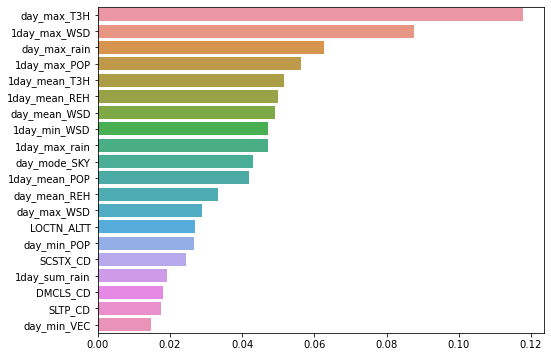

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importance_values = clf1.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled1.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

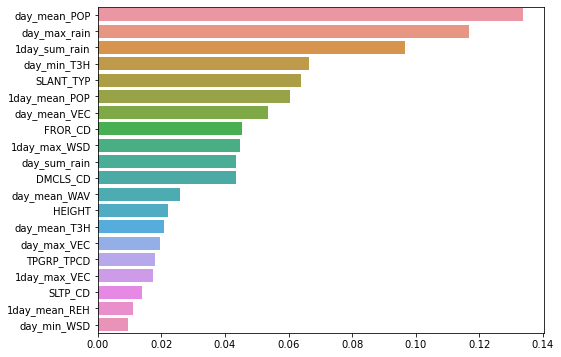

In [249]:
ftr_importance_values = clf2.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled2.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

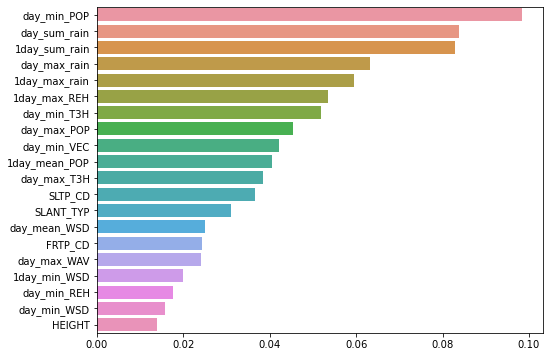

In [250]:
ftr_importance_values = clf3.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled3.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

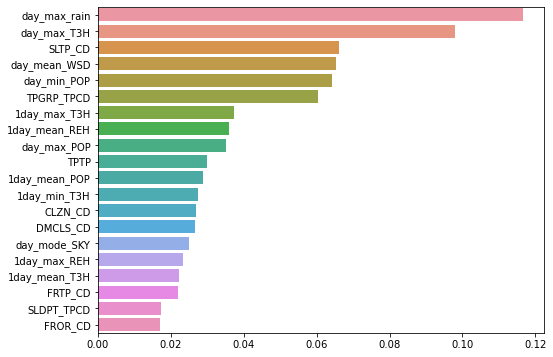

In [252]:
ftr_importance_values = clf4.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled4.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

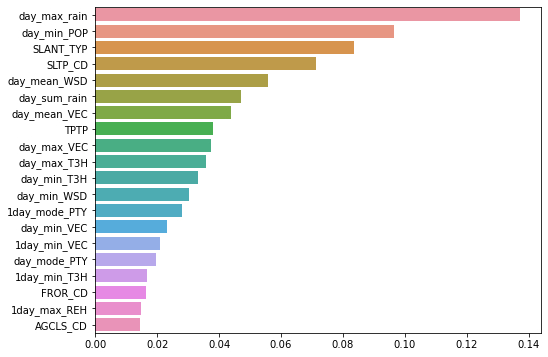

In [253]:
ftr_importance_values = clf5.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled5.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

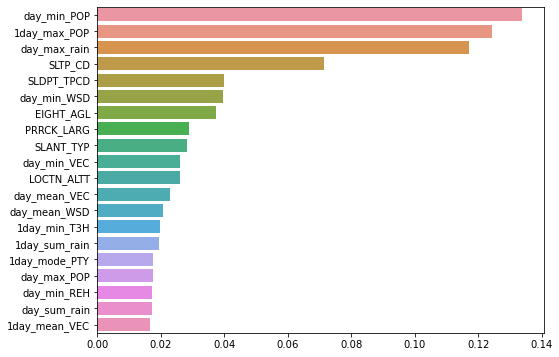

In [254]:
ftr_importance_values = clf6.feature_importances_
importance = pd.Series(ftr_importance_values, index=X_resampled6.columns)
top20=importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=top20, y = top20.index)
plt.show()

In [251]:
sub_2.to_csv('tab_101.csv', index=False, encoding='CP949')